In [1]:
#Tables and matrices
import numpy as np
import pandas as pd

#Stats
import scipy.stats as st
from scipy.optimize import fmin
from scipy import integrate
from scipy.stats.mstats import mquantiles
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from statsmodels.stats.diagnostic import het_breuschpagan #Heteroskedasticity test
from statsmodels.stats.diagnostic import het_white #Heteroskedasticity test
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Probabilistic programs
#!pip install numpy mkl #if you are in an intel machine i.e. in mac M# chips no
#!pip install pymc
#!pip install pytensor
import pymc as pm
import pytensor.tensor as pt
#import aesara.tensor as at
print('Running on PyMC v{}'.format(pm.__version__))


#Graphs 
#IMPORTANT: properly install ipywidgets and nodejs for interactive graphs
#If you are in jupyterlab, activate the widget extension (it should be in the latest versions)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib import animation, rc
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, HBox, VBox, Layout
from mpl_toolkits.mplot3d import axes3d
import arviz as az


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.10.3


In [2]:
def f(k,robust = False): #Esta función tiene comandos para la regresión y para gráficas.
    #k: heterosdactity parameter...larger more heteroscedasticity
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    #Noise here depends on the level of the variable X
    Y_noise = np.random.normal(loc = 0, scale = X_data**k, size = n)
    Y = pd.DataFrame({"X": X_data, "Y": Y_raw + Y_noise})
    
    # Regression
    model = smf.ols(formula='Y ~ X', data = Y)
    if robust == True:
        results = model.fit(cov_type='HC3') #robust standard errors (to heteroskedasticity)
    else:
        results = model.fit() 
    residuals = results.resid
    Y['predictions'] = results.predict(Y['X'])
    white_test = het_white(residuals,  model.exog)
    bp_test = het_breuschpagan(residuals, model.exog)
    
    
    #Gráficas
    sns.scatterplot(x = 'X', y='Y', data=Y, color = 'black', ax = axes[0])
    axes[0].set_title("Heteroskedasticity \n Variance in y depends on x level")
    axes[0].plot(Y['X'], Y['predictions'], color = 'red')
    axes[1].axis('off')
    const = str(round(results.params[0],3))
    slope = str(round(results.params[1],3))
    axes[1].text(0, 0.5, 'Truth: Intercept: 1.370; Coef. X: 2.097 \nRegres: Intercept: ' + const + '; Coef. X: ' + slope,
        color='black', fontsize=15)
    
    #Output
    plt.show()
    print(results.summary()) 
    print("Durbin Watson measures autocorrelation of residuals. Close to 2 is good, zero autocorrelations")
    print("Jarque Bera is a test of normality of the residuals for large samples (n>2000). Large values and p<0.05 not normal")
    labels = ['LM-Statistic','LM-Test p-value', 'F-Statistic', 'F-Test p-value']
    print("Breusch Pagan test (p<0.05 there is Heteroskedasticity): ", dict(zip(labels[2:4], bp_test[2:4]))) # p<0.05 hay heterocedasticidad
    print("White test (p<0.05 there is Heteroskedasticity): ", dict(zip(labels[2:4], white_test[2:4]))) # p<0.05 hay heterocedasticidad
    
    plt.figure()
    fig =  sm.graphics.plot_regress_exog(results, "X")
    fig.tight_layout(pad=1.0)
    


# Residuals and heteroskedasticity visualization.

It can bias the estimates as shown below. Change k and use robust std. error. Note how the normality, autocorrelation, and heteroskedasticity tests change. Also, the residuals visualizations.

In [3]:
n = 2000
X_data = np.linspace(1,100, n)
Y_raw = 1.37 + 2.097 * X_data #The underlying truth ... the majority of the times is unknown...here for pedagogical reasons we do know it

interact(f, k = widgets.FloatSlider(min=0, max=3, step=.2, value=1.25), 
         robust = widgets.Checkbox(value = False, description = 'Robust std. err.')); #Larger k more heteroskedasticity


interactive(children=(FloatSlider(value=1.25, description='k', max=3.0, step=0.2), Checkbox(value=False, descr…

# Running regressions in Python (and R to some extent)

C:\Users\L03552670\AppData\Local\Temp\ipykernel_52592\1350273194.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_r.replace({'Gender': {1: "Male", 2: "Female"}}, inplace = True)
C:\Users\L03552670\AppData\Local\Temp\ipykernel_52592\1350273194.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_r.replace({'Shop_Behavior': {1: "Physical", 2: "Online", 3: "Both"}}, inplace = True)


                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     60.92
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           2.57e-33
Time:                        13:41:47   Log-Likelihood:                -231.38
No. Observations:                 200   AIC:                             472.8
Df Residuals:                     195   BIC:                             489.2
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

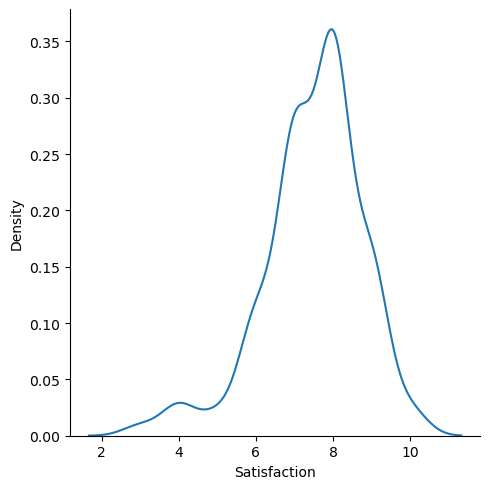

<Figure size 640x480 with 0 Axes>

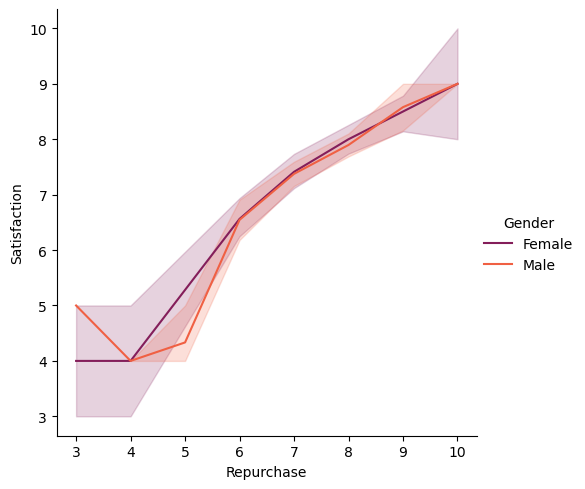

<Figure size 640x480 with 0 Axes>

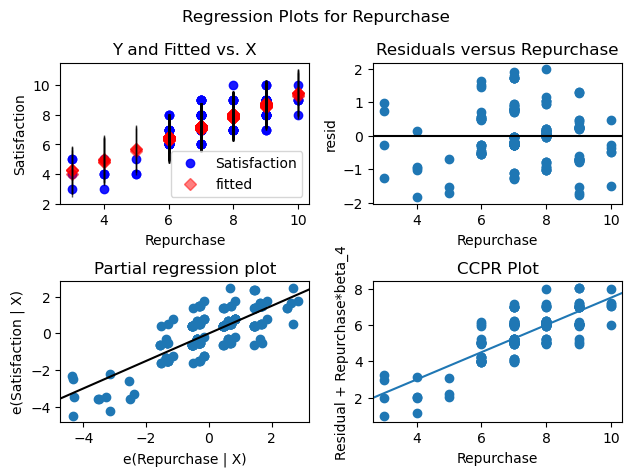

In [25]:
#Load data
#SOURCE: Harvard Business Publishing (SMU557)
#"Amazon: Facing low costumer satisfaction in Singapore"
#By: Marcus Ang Teck and Chen Yongchang, Singapore Management University
amazon = pd.read_csv("Amazon_Satisfaction_Singapore.csv")
amazon_var_dictionary = pd.read_csv("Amazon_Satisfaction_Singapore_Var_Dictionary.csv") #Description of variables


#Description of variables.
#Rename columns for something more informative
cols = ["ID", #Consumer
        "Company", #Seller name
        "Prod_Quality", #Overall Product Quality 1 Very low, 10 Very High
        "Service_Quality", #Overall Service Quality 
        "Price_Value", #Price given quality 1 Very poor price,  10 Very good price
        "Satisfaction", #Customer Satisfaction 1 Very dissatisfied, 10 Very satisfied
        "Repurchase", #Likelihood to Repurchase 1 Very unlikely, 10 Very likely
        "Recommend", #Likelihood to recommend
        "Recommend_Site", #Recommended ecommerce site to family and friends in the last 3 months  0 No, 1 Yes
        "Satisfaction_With", #Overall experiences SATISFACTION with (INSERT NAME) 1 Very dissatisfied, 10 Very satisfied
        "Variety_Prods", #Variety of products that interests me
        "Variety_Prods_Needs", #Variety of products that meet my needs
        "Ease_Navigation", #Ease of navigating the website or app
        "Ease_Prods_Needs", #Ease of finding the products you need
        "Availability_Prods", #Availability of products
        "Discounts", #Attractiveness of promotions and discounts offered
        "Info_Prods", #Sufficiency of Product information
        "Ease_Comparing", #Ease of comparing products
        "Ease_Special_Needs", #Ease of indicating special requests
        "Ease_Cart", #Ease of managing your shopping cart
        "Ease_Check_Out", #Check-out and payment process
        "Security", #Security of website
        "Delivery", #Clarity and usefulness of information on your delivery methods and fees
        "Delivery_Range", #Range of delivery options
        "Order_Tracking", #Ease of tracking your order
        "Delivery_Time", #Time taken to receive the product
        "Fidelity_Prods", #Products you received were as described on the website
        "Feedback", #Availability of feedback channels
        "Return_Policies", #Return and exchange policies
        "Channel_Pref", #Method Used most frequently to shop at (INSERT NAME) 1 Mobile App, 2 Website (Using PC), 3 Website (Using a mobile device)
        "Pay_Pref", #Method of payment do you prefer most for shopping online at (INSERT NAME) 1 Credit Cards, 2 PayPal, 3 E-nets, 4 AXS machines, 5 Cash upon delivery, 6 Others
        "Pay_Pref_Other", #Method of payment do you prefer most for shopping online at (INSERT NAME) Other specify
        "Read_Reviews", #Read the reviews during shopping experience 1 Yes 2 No
        "Interacted_Seller", #Interacted directly with the seller during shopping experience
        "Satisfaction_Reviews", #Satisfaction with the product reviews 1 Very dissatisfied, 10 Very satisfied
        "Satisfaction_Channels_Seller", #Satisfaction with the channels available to communicate with the seller(s)
        "No_Purchases_6m", #No. of times purchased in the last 6 months
        "Amount_Spent_3m", #Average amount spent per visit last 3 months
        "Shop_Behavior", #General Shopping Behavior: Usually make most purchases on physical store or an online store 1 Physical store, 2 Online store 3 Equal for both physical store &  online store
        "Age", #Age
        "Race", #Race of the respondent 1 Chinese, 2 Malay, 3 Indian, 4 Eurasian, 5 Others
        "Employment", #Employment status of the respondent 1 Working full-time, 2 Working part-time, 3 Homemaker, 4 Retired, 5 Student, 6 Unemployed
        "Income_Personal", #Monthly Personal Income "1	Under SGD 2K; 2 SGD 2K - Under SGD 3K; 3 SGD 3K - Under SGD 4K; 4	SGD 4K - Under SGD 6K; 5	SGD 6K - Under SGD 8K: 6	SGD 8K - Under SGD 10K; 7	SGD 10K - Under SGD 15K; 8	SGD 15K - Under SGD 20K; 9	SGD 20K or over"
        "Income_House", #Monthly Household Income
        "Ed", #Education Qualification "1	None; 2	PSLE & below; 3	GCE N Level; 4	GCE O Level; 5	GCE A Level / Post-Secondary; 6	ITE / Vocational Institute; 7	Polytechnic Diploma / Professional Cert; 8	University Degree; 9	University Post-Graduate Degree"
        "No_Children", #No. of children dependent for financial support
        "Marital", #Marital Status "1	Single; 2	Married; 3	Divorced; 4	Widowed; 5	Separated;6	Domestic Partnership"
        "Gender", #Gender "1	Male; 2	Female"
        "House_Type", #Housetype according to respondent "1	HDB 1-2 room; 2	HDB 3 room; 3	HDB 4 room; 4	HDB 5 room / Executive Flat; 5	Condo / Ptd Apartment; 6	Landed Property"
        "Date_Interview", #Date of Interview
       ]
amazon.columns = cols

#Filter for only companies you need
amazon_r = amazon.query("Company=='AMAZON'")


#Some EDA plots
amazon_r.replace({'Gender': {1: "Male", 2: "Female"}}, inplace = True)
amazon_r.replace({'Shop_Behavior': {1: "Physical", 2: "Online", 3: "Both"}}, inplace = True)
#Distribution of the DV: satisfaction
#sns.catplot(data = amazon_r, y = "Satisfaction" , kind = "box")
sns.displot(amazon_r, x = "Satisfaction", kind = "kde");
plt.figure();
sns.relplot(amazon_r, x = "Repurchase", y = "Satisfaction", hue = "Gender",
           palette = sns.color_palette("rocket",
                                        n_colors = amazon_r.Gender.unique().shape[0]),
           kind = "line")


#Now the regression
model = smf.ols(formula='Satisfaction ~ Repurchase + Shop_Behavior + Gender', data = amazon_r)
results = model.fit(cov_type='HC3') #robust standard errors (to heteroskedasticity)
residuals = results.resid
white_test = het_white(residuals,  model.exog)
bp_test = het_breuschpagan(residuals, model.exog)
    

#Output
print(results.summary()) 
print("Durbin Watson measures autocorrelation of residuals. Close to 2 is good, zero autocorrelations")
print("Jarque Bera is a test of normality of the residuals for large samples (n>2000). Large values and p<0.05 not normal")
labels = ['LM-Statistic','LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print("Breusch Pagan test (p<0.05 there is Heteroskedasticity): ", dict(zip(labels[2:4], bp_test[2:4]))) # p<0.05 hay heterocedasticidad
print("White test (p<0.05 there is Heteroskedasticity): ", dict(zip(labels[2:4], white_test[2:4]))) # p<0.05 hay heterocedasticidad

plt.figure()
#fig =  sm.graphics.plot_regress_exog(results, "Gender[T.Male]")
fig =  sm.graphics.plot_regress_exog(results, "Repurchase")
fig.tight_layout(pad=1.0)

### Exercise (Formulas + Regression)
1) Use the previous amazon_r data
2) print data types of amazon_r
3) Plot variables or cross of variables you feel are relevant. Pick plot types that reveal the variable(s) distribution. Interpret.
4) Understand the formulae of python (and r). What is the difference between : and \*. For instance, what is the formula you get with x\*y\*z
5) Read the case "Amazon: Facing low costumer satisfaction in Singapore"
    1)  Create a new dataset with companies with 200 observations or more. Tip: use .groupby and .count()
    2)  How does Amazon perform in these metrics relative to the competition. Use barplots with error bars (tip; use seaborn catplot). In which did Amazon perform well? In which poorly?:
        * Consumer satisfaction
        * Willingness to recommend
        * Average costumer spend
        * Frequency of visit
    3) With a regression, compare the performance of Amazon and Qoo10 in consumer satisfaction. That is, run a regression with data only from these two companies. Tip: include "Company" in the regression. Include more variables, and justify their inclusion. 
        1)   Interpret the autocorrelation and normality tests from .summary()
        2)   According to the Heteroskedasticity test. Do you need robust std. errors?
        3)   Plot the residuals of one of the right hand variables of your regression. Do they look normal?
        4)   Interpret the regression coefficients.
               * What should Amazon do to improve its performance? What is Qoo10 doing better?
                 
             


# Trou Normand: Bayesian Regression

Also check the package [Bambi](https://bambinos.github.io/bambi/)

In a traditional regression, we infer the parameters of normal that changes mean according to the values of variables X (assumption, the standard deviation of the normal is fixed):

<center><img src="5_CB/Kruschke3.svg" width = "401" height = '400'></center>


$$ y|\beta, \sigma, X \sim Normal(X \beta,\sigma I)$$
$I$ identity; we assume homocedasticity.

The unique thing with bayes is that we can infer $\beta$ and $\sigma$ with `uncertainty`

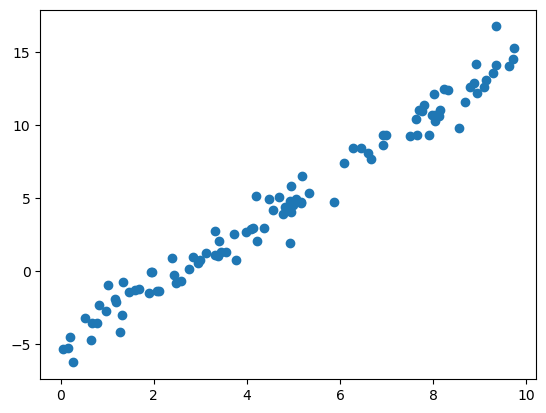

In [5]:
n = 100
x = np.random.uniform(0,10,n)
y = 2 * x - 5 + np.random.normal(0,1,n)
plt.scatter(x, y);

In [6]:
with pm.Model() as basic_model:

    #Priors
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=3)

    # Deterministics
    #mu = pm.Deterministic("mu", alpha + beta*x) #to save in trace the deterministic value
    mu = alpha + beta*x
    
    # Likelihood 
    Ylikelihood = pm.Normal('Ylikelihood', mu=mu, sigma=sigma, observed=y)
    
    # Samples
    trace = pm.sample(draws=3000, idata_kwargs = {'log_likelihood': True}) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 58 seconds.


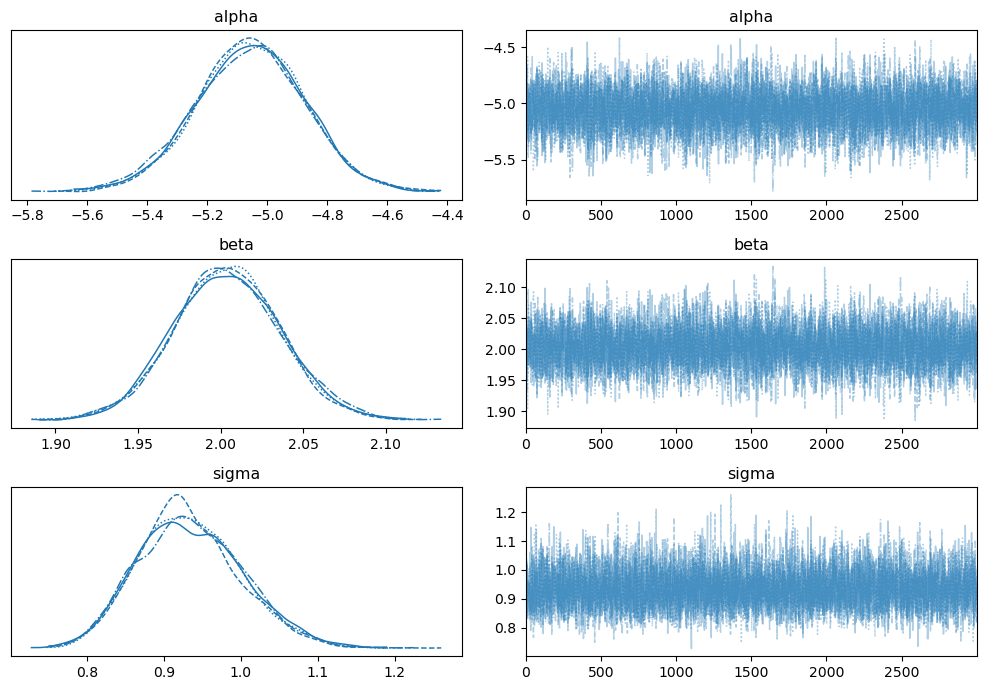

In [7]:
#Convergence
az.plot_trace(trace, figsize = [10,7]);
plt.tight_layout()
#plt.savefig("img/5_CB/trace_regression.svg"); plt.close()
#az.rhat(data) #Si es <1.1 está bien

In [8]:
with basic_model:
    print(pm.summary(trace).round(2))
    #pm.plots.forestplot(trace)

       mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha -5.06  0.18   -5.41    -4.73        0.0      0.0    6138.0    5796.0   
beta   2.00  0.03    1.94     2.07        0.0      0.0    6019.0    5259.0   
sigma  0.93  0.07    0.81     1.06        0.0      0.0    6928.0    5663.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0  


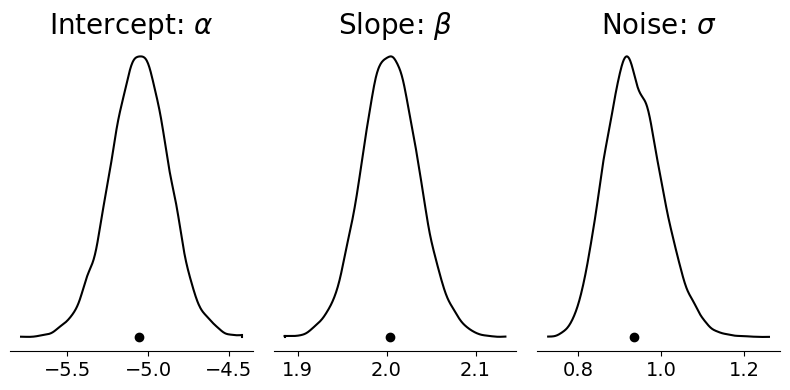

In [9]:
alpha_post = np.array(trace.posterior.alpha).flatten()
beta_post = np.array(trace.posterior.beta).flatten()
sigma_post = np.array(trace.posterior.sigma).flatten()
fig, ax = plt.subplots(1,3, figsize=(8,4))
az.plot_density(alpha_post, 
                ax = ax[0], colors = 'k',hdi_prob=1)
ax[0].set_title(r'Intercept: $\alpha$', fontsize = 20)
az.plot_density(beta_post, 
                ax = ax[1], colors = 'k', hdi_prob=1)
ax[1].set_title(r'Slope: $\beta$', fontsize = 20)
az.plot_density(sigma_post, 
                ax = ax[2], colors = 'k', hdi_prob=1)
ax[2].set_title(r'Noise: $\sigma$', fontsize = 20);
plt.tight_layout()
#plt.savefig("img/5_CB/density_regression.svg"); plt.close()

Is it a good model?. Let's start with posterior predictive checks (i.e. simulate new data). We can use the mean of $y$ in the data to compare.

In [10]:
with basic_model:
    ypred = pm.sampling.sample_posterior_predictive(trace=trace)
    sh = ypred.posterior_predictive.Ylikelihood.shape
    y_sample_posterior_predictive = np.reshape(np.array(ypred.posterior_predictive.Ylikelihood), 
                                              (sh[0]*sh[1],sh[2]))

Sampling: [Ylikelihood]


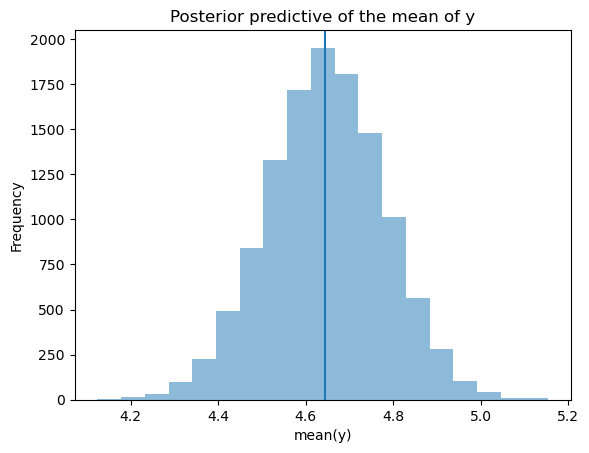

In [11]:
_, ax = plt.subplots()
ax.hist([n.mean() for n in y_sample_posterior_predictive], bins=19, alpha=0.5)
ax.axvline(y.mean()) #actual data
ax.set(title='Posterior predictive of the mean of y', xlabel='mean(y)', ylabel='Frequency');

The posterior predictive check replicates and important stat: the mean of y.

Now let's compare with WAIC the regression with a null regression (just an intercept)

In [12]:
with pm.Model() as null_model:
    #Priors
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=4)

    # Deterministics
    #mu = pm.Deterministic("mu", alpha + beta*x) #to save in trace the deterministic value
    mu = alpha 
    
    # Likelihood 
    Ylikelihood = pm.Normal('Ylikelihood', mu=mu, sigma=sigma, observed=y)
    
    # Samples
    trace_null = pm.sample(draws=3000,  idata_kwargs = {'log_likelihood': True}) 


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, sigma]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 62 seconds.


In [13]:
with null_model:
    print(pm.summary(trace_null).round(2))

       mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  4.62  0.58    3.54     5.73        0.0      0.0   11898.0    7685.0   
sigma  5.89  0.42    5.12     6.67        0.0      0.0   12803.0    8488.0   

       r_hat  
alpha    1.0  
sigma    1.0  


In [14]:
az.compare({'Base': trace, 'Null': trace_null}, ic = 'loo')
    

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Base,0,-136.306954,3.652021,0.000000,1.000000e+00,9.257304,0.000000,False,log
Null,1,-320.220077,1.412042,183.913123,9.998473e-10,4.781626,9.629026,False,log


# Logistic Regression

James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An
introduction to statistical learning: With applications in python. Springer
Nature

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction', 'Direction_Original'],
      dtype='object')
The strongest correlation seems between Year and Volume
                Year      Lag1      Lag2      Lag3      Lag4      Lag5  \
Year       1.000000  0.029700  0.030596  0.033195  0.035689  0.029788   
Lag1       0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675   
Lag2       0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558   
Lag3       0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808   
Lag4       0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084   
Lag5       0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000   
Volume     0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002   
Today      0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860   
Direction  0.074608 -0.039757 -0.024081  0.006132  0.004215  0.005423   

             Volume     Today  Direction  
Year       0.539006  0.030095 

<Axes: >

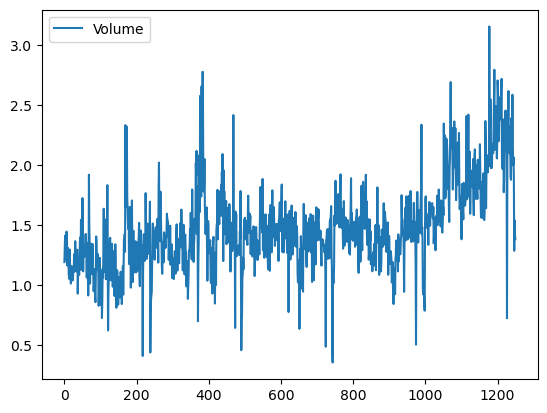

In [15]:
#Load data
#"This data set consists of percentage returns for the S&P 500 stock
#index over 1,250 days, from the beginning of 2001 until the end of 2005.
#For each date, we have recorded the percentage returns for each of the five
#previous trading days, Lag1 through Lag5. We have also recorded Volume
#(the number of shares traded on the previous day, in billions), Today (the
#percentage return on the date in question) and Direction (whether the
#market was Up or Down on this date)." James, et al, (2023)

Smarket = pd.read_csv("Smarket.csv")
Smarket.insert(Smarket.shape[1], "Direction_Original", Smarket.Direction)
Smarket.replace({'Direction': {"Up":1, "Down":0}}, inplace = True)
print(Smarket.columns)

#Some EDA
print("The strongest correlation seems between Year and Volume\n", 
      Smarket.corr(numeric_only=True))
Smarket.plot(y='Volume')


Nothing significant
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Wed, 14 Feb 2024   Deviance:                       1727.6
Time:                        12:56:53   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002868
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.242

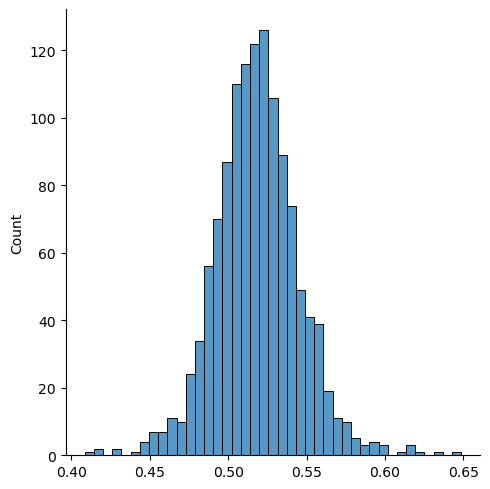

In [16]:
#Now a regression of Direction with Lags and Volume
glm = smf.glm("Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", 
              family=sm.families.Binomial(), #default link function is logit 
              data=Smarket).fit(cov_type='HC3')
print("Nothing significant")
print(glm.summary())
probs = glm.predict() #Default: using the info on each row of the data
print(probs.shape) 
sns.displot(probs, kind = "hist")
#If specific values:
df_to_pred = pd.DataFrame.from_dict({"Lag1":[1,2], "Lag2":[0,2], "Lag3":[2,2], "Lag4":[3,2], "Lag5":[-1,2], "Volume":[1,2]})
print("\nSome predictions (see code for X values):") 
print(glm.predict(df_to_pred))

#Predict up or down if probs>0.5
labels = np.array(['Down']*probs.shape[0]) #initialize labels
labels[probs >0.5] = "Up" #change "Down" to "Up" if condition holds

CM = pd.DataFrame(confusion_matrix(labels , Smarket.Direction_Original),
                  index = ["Down_Pred", "Up_Pred"], columns = ["Down_Real", "Up_Real"])
OA = (CM.iloc[0,0] + CM.iloc[1,1])/labels.shape[0] #overall accuracy
print("\nConfussion Matrix",
      "\nOverall Accuracy (sum diagonal/total):", OA,
      "\nIt did well for UP, not so much for DOWN:")
print(CM)

Bad practice: we trained and tested with the same data. 

Let's break the data into train and test sets. That is, we ran the logistic regression with a subset of the data (train) and predict for the remaning (test)

In [17]:
#Train set. One way is to choose randomly.
#However, perhaps we want to see if the past predicts the future. 
#Let's train with data before year 2005.
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_test.shape

#Train
glm_train = smf.glm("Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", 
                    family=sm.families.Binomial(), #default link function is logit 
                    data=Smarket_train).fit(cov_type='HC3')
print(glm_train.summary())
probs = glm_train.predict(Smarket_test.loc[:, ["Direction", "Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]])

#Predict up or down if probs>0.5
labels = np.array(['Down']*probs.shape[0]) #initialize labels
labels[probs >0.5] = "Up" #change "Down" to "Up" if condition holds

CM = pd.DataFrame(confusion_matrix(labels , Smarket_test.Direction_Original),
                  index = ["Down_Pred", "Up_Pred"], columns = ["Down_Real", "Up_Real"])
OA = (CM.iloc[0,0] + CM.iloc[1,1])/labels.shape[0] #overall accuracy
print("\nConfussion Matrix Test Set",
      "\nOverall Accuracy (sum diagonal/total):", np.round(OA,4),
      "\nPreviously we overfitted i.e. overall accuracy dropped")
print(CM)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  998
Model:                            GLM   Df Residuals:                      991
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -690.55
Date:                Wed, 14 Feb 2024   Deviance:                       1381.1
Time:                        12:56:58   Pearson chi2:                     998.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002162
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1912      0.334      0.573      0.5

Dissapointing? Here is what the authors of the textbook think:
>"Of course this result is not all that surprising, given that one would not generally expect to be
able to use previous days’ returns to predict future market performance. (After all, if it were possible to do so, then the authors of this book would be out striking it rich rather than writing a statistics textbook.)" pg. 177



Let's see if we can improve by keeping the best variables (as judged by p-values)

In [18]:
#Train
glm_train = smf.glm("Direction ~ Lag1 + Lag2", 
                    family=sm.families.Binomial(), #default link function is logit 
                    data=Smarket_train).fit(cov_type='HC3')
print(glm_train.summary())
probs = glm_train.predict(Smarket_test.loc[:, ["Direction", "Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]])

#Predict up or down if probs>0.5
labels = np.array(['Down']*probs.shape[0]) #initialize labels
labels[probs >0.5] = "Up" #change "Down" to "Up" if condition holds

CM = pd.DataFrame(confusion_matrix(labels , Smarket_test.Direction_Original),
                  index = ["Down_Pred", "Up_Pred"], columns = ["Down_Real", "Up_Real"])
OA = (CM.iloc[0,0] + CM.iloc[1,1])/labels.shape[0] #overall accuracy
print("\nConfussion Matrix Test Set",
      "\nOverall Accuracy (sum diagonal/total):", np.round(OA,4),
      "\nBias-Variance tradeoff: We improved by removing some variables")
print(CM)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  998
Model:                            GLM   Df Residuals:                      995
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -690.70
Date:                Wed, 14 Feb 2024   Deviance:                       1381.4
Time:                        12:57:02   Pearson chi2:                     998.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001865
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0322      0.063      0.508      0.6

## Exercise (classification)
In James, G., Witten, D., Hastie, T., Tibshirani, R. & Taylor, J. (2023). An introduction to statistical learning: with Application in Python. New York: springer. Chapter 4.

1) Load the Weekly.csv data as weekly. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.
2) Copy the column Direction to a new column Direction_Original.
3) Change the values of Direction, so that Down = 0 and Up = 1. This is to facilitate interpretation.
4) Print the column names
5) Produce some numerical and graphical summaries of the weekly data. Do there appear to be any patterns?
6) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?
7) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.
8) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010). Did it improve?
9) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data.

# More classification techniques
* K nearest neighbors o K means clustering (KNN)
    * a clustering technique but still useful for classification
* Linear discriminant analysis
* Quadratic discriminant analysis
* Others (for future courses) (Naive Bayes, Support Vector Machine)

### KNN (a clustering technique but still useful for classification)
* VanderPlas, J. (2022). Python data science handbook: Essential tools for working with data. O'Reilly Media, Inc. 

This is an unsupervised learning technique (not 100%, we still define the number of clusters).

We can cluster around n dimensions (but beware curse of dimensionality). For instance, cluster customers around income, years of education, and amount of debt.

An optimal cluster has:
* The cluster center is the arithmetic mean of all the points belonging to the cluster.
* Each point is closer to its own cluster center than to other cluster centers.

Some drawbacks with this definition:
* Hard to interpret if the clusters have complicated geometries


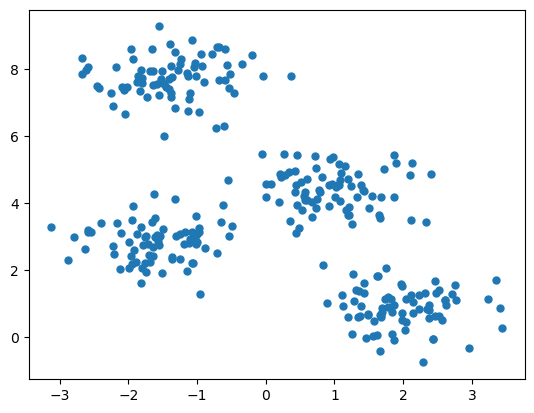

In [19]:
#Generated synthetic data
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=25);

In [20]:
kmeans = KMeans(n_clusters=4, random_state=0) #we have to tell it the number of clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\L03552670\anaconda3\envs\PyMC_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


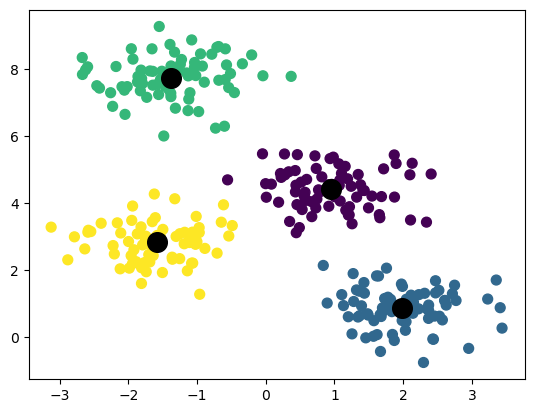

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')centers = kmeans.cluster_centers_   
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

The idea is to interpret those clusters. Let's imagine that the previous graph the variable are customer acquisition cost and age.

(15.0, 65.0)

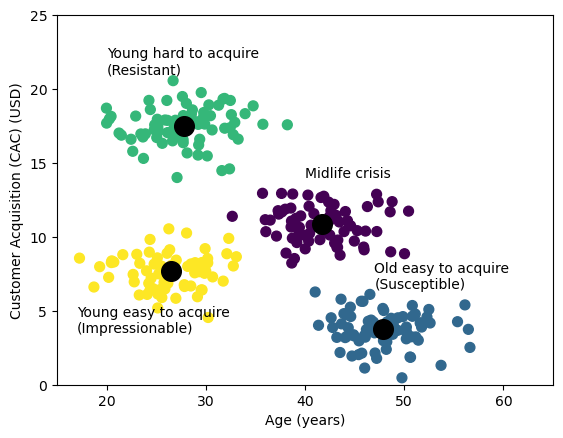

In [22]:
x = (X[:, 0]+6)*6
x_c = (centers[:, 0]+6)*6
y = 2*(X[:, 1] + 1)
y_c = 2*(centers[:, 1]+1)
plt.scatter(x, y, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_   
plt.scatter(x_c, y_c, c='black', s=200);
plt.xlabel("Age (years)")
plt.ylabel("Customer Acquisition (CAC) (USD)")
plt.text(20, 21, "Young hard to acquire\n(Resistant)")
plt.text(17, 3.5, "Young easy to acquire\n(Impressionable)")
plt.text(40, 14, "Midlife crisis")
plt.text(47, 6.5, "Old easy to acquire\n(Susceptible)")
plt.ylim(0,25)
plt.xlim(15,65)

### Exercise (clustering)
[Source: Kaggle](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)
Credit card data variables

CUST_ID : Identification of Credit Card holder (Categorical) <br>
BALANCE : Balance amount left in their account to make purchases <br>
BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
PURCHASES : Amount of purchases made from account<br>
ONEOFF_PURCHASES : Maximum purchase amount done in one-go<br>
INSTALLMENTS_PURCHASES : Amount of purchase done in installment<br>
CASH_ADVANCE : Cash in advance given by the user<br>
PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid<br>
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"<br>
PURCHASES_TRX : Numbe of purchase transactions made<br>
CREDIT_LIMIT : Limit of Credit Card for user<br>
PAYMENTS : Amount of Payment done by user<br>
MINIMUM_PAYMENTS : Minimum amount of payments made by user<br>
PRCFULLPAYMENT : Percent of full payment paid by user<br>
TENURE : Tenure of credit card service for user<br>


1) Load data Customer_Data.csv and name it credit_card
2) Summarize data with .describe()
3) Do a scatter plot with seaborn. Do you see any pattern? x = "CREDIT_LIMIT", y = "BALANCE", hue = "TENURE"
4) Do 4 clusters with KMeans with x1 = "CREDIT_LIMIT", x2 = "BALANCE", x3 = "TENURE"
5) Do a new scatter plot in a new figure with x = "CREDIT_LIMIT", y = "BALANCE". Color each cluster differently and draw the center of the cluster
6) Put a label on each cluster that you think would describe it

# The general classification problem (in Bayesian terms)
The posterior probability of a k category among K given X features
$$p(Y=k|X=x) = \frac{\pi_k p(x|k)}{\sum_{l=1}^K\pi_l p(x|l)}$$

$\pi_k$ is the prior probability of a k category, and $p(x|k)$ is the likelihood of the observed features given the k category 

Most techniques assume a flat prior. They differ on $p(x|k)$

The overall spirit is to classify x features as belonging to the k category if the posterior probability is above a threshold (say >0.5).

For instance, if feature x, say size, is below the threshold, the feature(s) is(are) consistent with category A (green distribution), else B (pink)
<div style="text-align:center;"> <img src="img/ISLP_Class_1.png" width="500"/></div>

What about more features, say color and size. There are multidimensional distributions e.g. multivariate normal
<div style="text-align:center;"> <img src="img/ISLP_Class_2.png" width="500"/></div>

In [23]:
#Let's use again the market data
Smarket = pd.read_csv("Smarket.csv")
Smarket.insert(Smarket.shape[1], "Direction_Original", Smarket.Direction)
Smarket.replace({'Direction': {"Up":1, "Down":0}}, inplace = True)
print(Smarket.columns)

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction', 'Direction_Original'],
      dtype='object')


## Linear Discriminant Analysis (LDA)

The function for $p(x|k)$ is a normal distribution, for all k categories, and we assume the same variance $\Sigma$.

In discriminant analysis, we calculate a discriminant function. The set of features that has the larger descriminant, it is classified as the target category k. This is the discriminant function (comes from taking logs to the Bayes Theorem):

$$g_k(\mathbf{x}) = \log(\pi_k) - \frac{1}{2} \mathbf{\mu}_k^T \mathbf{\Sigma}^{-1} \mathbf{\mu}_k + \mathbf{x}^T \mathbf{\Sigma}^{-1} \mathbf{\mu}_)$$

We calculate this quantity for each class, and classify to category k the x with the largest value. This is equivalent as classifying based on the largest posterior probability. 

Is linear because X is in linear form.

The right solid line is the LDA threshold. In this example, the x axis is a continuous metric for the x feature. That feature has different probabilities according to the category. We can use those probabilities to classify x into a category. For problems with more than two classes the labels are chosen as the class whose posterior probability is highest.
<div style="text-align:center;"> <img src="img/ISLP_Class_1.png" width="500"/></div>

In [24]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
print(Smarket_test.shape)
X = Smarket.loc[:, ['Lag1', 'Lag2']] #we can add more variables
X_train , X_test = X.loc[train], X.loc[~train]
D = Smarket.Direction
L_train , L_test = D.loc[train], D.loc[~train] #Labels

(252, 10)


In [25]:
lda = LDA(store_covariance=True)
lda.fit(X_train , L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [26]:
print(lda.classes_) #0 down, 1 up
print(lda.priors_) #of down and up

[0 1]
[0.49198397 0.50801603]


In [27]:
lda_pred = lda.predict(X_test)
CM = pd.DataFrame(confusion_matrix(lda_pred , L_test),
                  index = ["Down_Pred", "Up_Pred"], columns = ["Down_Real", "Up_Real"])
OA = (CM.iloc[0,0] + CM.iloc[1,1])/L_test.shape[0] #overall accuracy
print("\nConfussion Matrix Test Set",
      "\nOverall Accuracy (sum diagonal/total):", np.round(OA,4),
      "\nLDA did comparable to logistic regression (see previous cells)")
print(CM)


Confussion Matrix Test Set 
Overall Accuracy (sum diagonal/total): 0.5595 
LDA did comparable to logistic regression (see previous cells)
           Down_Real  Up_Real
Down_Pred         35       35
Up_Pred           76      106


In [28]:
#LDA uses a 50% threshold
lda_prob = lda.predict_proba(X_test) #obtain the probability of each row in X_test (>0.5 up)
np.all(np.where(lda_prob[:,1] >= 0.5, 1, 0) == lda_pred) #if true, all lda_pred are identical to lda_prob

True

In [29]:
#If we want a stricter threshold (for up):
np.sum(lda_prob[:,0] > 0.7) #but there is zero up with such criteria in this data

0

## Quadratic Discriminant Analysis (QDA)

A critical difference is that QDA does not assume same variance $\Sigma$ between features across categories.
$$X \sim N(\mu_k, \Sigma_k)$$
It is called quadratic because in the discriminat X appears squared
$$ g_k(\mathbf{x}) = -\frac{1}{2} \log|\mathbf{\Sigma}_k| - \frac{1}{2} (\mathbf{x} - \mathbf{\mu}_k)^T \mathbf{\Sigma}_k^{-1} (\mathbf{x} - \mathbf{\mu}_k) + \log(\pi_k)$$

In [30]:
qda = QDA(store_covariance=True)
qda.fit(X_train , L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [31]:
#Estimated covariance in the first class
qda.covariance_[0]

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [32]:
qda_pred = qda.predict(X_test)
CM = pd.DataFrame(confusion_matrix(qda_pred , L_test),
                  index = ["Down_Pred", "Up_Pred"], columns = ["Down_Real", "Up_Real"])
OA = (CM.iloc[0,0] + CM.iloc[1,1])/L_test.shape[0] #overall accuracy
print("\nConfussion Matrix Test Set",
      "\nOverall Accuracy (sum diagonal/total):", np.round(OA,4),
      "\nQDA did better than LDA and logistic (see previous cells)")
print(CM)


Confussion Matrix Test Set 
Overall Accuracy (sum diagonal/total): 0.5992 
QDA did better than LDA and logistic (see previous cells)
           Down_Real  Up_Real
Down_Pred         30       20
Up_Pred           81      121


## LDA or QDA? It depends. 

* LDA is less complex by assuming equal $\Sigma$ across categories, and perhaps has less variance (in the sense of better predictions on the test set; not to confuse with $\Sigma$), but if the assumption that all categories have equal variance is inappropriate, then we may be better of with QDA.
* QDA is more complex, because it estimates a different variance $\Sigma_k$ for each category, and could help in difficult problems. But this may lead to higher variance (i.e. worst predictions on the test set)

## Exercise (LDA, QDA, KNN)

In James, G., Witten, D., Hastie, T., Tibshirani, R. & Taylor, J. (2023). An introduction to statistical learning: with Application in Python. New York: springer. Chapter 4.

1) Load the Weekly.csv data as weekly. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.
2) Copy the column Direction to a new column Direction_Original.
3) Change the values of Direction, so that Down = 0 and Up = 1. This is to facilitate interpretation.
4) Print the column names
6) Use LDA, QDA, and KNN to generate predictions. Use a training data period from 1990 to 2008, with Lag2 as the only predictor.
7) Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010) for LDA, QDA, and KNN. Which technique seems better? Do you have an intuition why?

